In [ ]:
!pip install pandas numpy mlxtend scipy openpyxl

# Step 1


In [3]:
import pandas as pd

file_path = 'Online Retail.xlsx'

print("Loading data...")

df = pd.read_excel(file_path)

print(f"Original Data Shape: {df.shape}")

df_clean = df.dropna()


df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.contains('C')]


df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

print(f"Cleaned Data Shape: {df_clean.shape}")
print("Data cleaning complete.")

print(df_clean.head())

Loading data...
Original Data Shape: (541909, 8)
Cleaned Data Shape: (397884, 8)
Data cleaning complete.
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Step 2 : Creating the Binary Matrix


In [4]:
basket = (df_clean.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)


print(f"Matrix Shape: {basket_encoded.shape}")

print(basket_encoded.head())

/tmp/ipython-input-3070896288.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(encode_units)


Matrix Shape: (18532, 3877)
Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                      

In [ ]:
import numpy as np





invoice_dates = df_clean[['InvoiceNo', 'InvoiceDate']].drop_duplicates()


invoice_dates['InvoiceDate'] = pd.to_datetime(invoice_dates['InvoiceDate'])


invoice_dates = invoice_dates.sort_values('InvoiceDate')







sorted_invoices = invoice_dates['InvoiceNo'].unique()
basket_sorted = basket_encoded.reindex(sorted_invoices).dropna()







num_batches = 4  
batches = np.array_split(basket_sorted, num_batches)




print(f"Total Invoices: {basket_sorted.shape[0]}")
print(f"Number of Batches: {len(batches)}")

for i, batch in enumerate(batches):
    
    
    batch_invoices = batch.index
    batch_dates = invoice_dates[invoice_dates['InvoiceNo'].isin(batch_invoices)]['InvoiceDate']

    start_date = batch_dates.min().date()
    end_date = batch_dates.max().date()

    print(f"Batch {i+1}: {batch.shape[0]} transactions | Period: {start_date} to {end_date}")

Total Invoices: 18532
Number of Batches: 4
Batch 1: 4633 transactions | Period: 2010-12-01 to 2011-03-30
Batch 2: 4633 transactions | Period: 2011-03-30 to 2011-07-12
Batch 3: 4633 transactions | Period: 2011-07-12 to 2011-10-12
Batch 4: 4633 transactions | Period: 2011-10-12 to 2011-12-09


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:54: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import IncrementalPCA
import numpy as np
import pandas as pd




class FrequentDirections:
    def __init__(self, d, k):
        """
        d: Number of columns (features/products)
        k: Sketch size (number of rows to keep in the sketch)
        """
        self.k = k
        self.d = d
        self.sketch = np.zeros((2 * k, d))
        self.current_row = 0

    def fit_partial(self, batch_data):

        batch_array = batch_data.values
        n_rows = batch_array.shape[0]

        for i in range(n_rows):

            if self.current_row >= 2 * self.k:
                self._compress()


            self.sketch[self.current_row, :] = batch_array[i, :]
            self.current_row += 1

    def _compress(self):

        U, s, Vt = np.linalg.svd(self.sketch, full_matrices=False)


        delta = s[self.k] ** 2
        s_prime = np.sqrt(np.maximum(s[:self.k]**2 - delta, 0))


        self.sketch = np.zeros((2 * self.k, self.d))
        self.sketch[:self.k, :] = np.diag(s_prime) @ Vt[:self.k, :]
        self.current_row = self.k

    def get_singular_values(self):

        _, s, _ = np.linalg.svd(self.sketch[:self.current_row, :])
        return s[:self.k]


n_components = 10
n_features = basket_encoded.shape[1]

rgp = GaussianRandomProjection(n_components=n_components, random_state=42)


ipca = IncrementalPCA(n_components=n_components)

fd = FrequentDirections(d=n_features, k=n_components)



monitoring_log = []

print(f"Starting Stream Processing on {len(batches)} batches...")

for i, batch in enumerate(batches):
    print(f"Processing Batch {i+1}...")

    batch_rgp = rgp.fit_transform(batch)
    rgp_variance = np.var(batch_rgp)


    ipca.partial_fit(batch)
    ipca_var_ratio = np.sum(ipca.explained_variance_ratio_)


    fd.fit_partial(batch)
    fd_top_singular_val = fd.get_singular_values()[0]

    monitoring_log.append({
        'Batch': i+1,
        'RGP_Variance': rgp_variance,
        'IPCA_Explained_Var': ipca_var_ratio,
        'FD_Top_Singular_Val': fd_top_singular_val
    })


results_df = pd.DataFrame(monitoring_log)
print("\nMatrix Monitoring Results:")
print(results_df)

Starting Stream Processing on 4 batches...
Processing Batch 1...
Processing Batch 2...
Processing Batch 3...
Processing Batch 4...

Matrix Monitoring Results:
   Batch  RGP_Variance  IPCA_Explained_Var  FD_Top_Singular_Val
0      1      1.939249            0.095703             9.195624
1      2      1.891488            0.089107             9.540615
2      3      2.194731            0.087332            17.206239
3      4      2.264903            0.084582            18.547683


In [8]:
results_df

,Batch,RGP_Variance,IPCA_Explained_Var,FD_Top_Singular_Val
0,1,1.939249,0.095703,9.195624
1,2,1.891488,0.089107,9.540615
2,3,2.194731,0.087332,17.206239
3,4,2.264903,0.084582,18.547683


# Step 5


In [ ]:
from sklearn.metrics import mean_squared_error





def calculate_reconstruction_error(original, reconstructed):
    """
    Computes the Frobenius Norm of the difference matrix (Error).
    Formula: || A - A_approx ||_F
    """
    diff = original - reconstructed
    return np.linalg.norm(diff, 'fro')

def get_fd_basis(fd_sketch):
    """
    Extracts an orthonormal basis from the Frequent Directions sketch
    so we can use it to project/reconstruct data like PCA.
    """
    
    
    _, _, Vt = np.linalg.svd(fd_sketch, full_matrices=False)
    return Vt





metrics_log = []

print(f"Analyzing {len(batches)} batches...")

for i, batch in enumerate(batches):
    batch_val = batch.values 

    
    
    original_norm = np.linalg.norm(batch_val, 'fro')

    
    
    
    
    ipca.partial_fit(batch)

    
    
    batch_transformed_ipca = ipca.transform(batch)
    batch_reconstructed_ipca = ipca.inverse_transform(batch_transformed_ipca)

    
    rec_error_ipca = calculate_reconstruction_error(batch_val, batch_reconstructed_ipca)
    expl_var_ipca = np.sum(ipca.explained_variance_ratio_)

    
    
    
    
    
    batch_transformed_rgp = rgp.transform(batch)

    
    
    
    components_pinv = np.linalg.pinv(rgp.components_)
    batch_reconstructed_rgp = np.dot(batch_transformed_rgp, components_pinv.T)

    
    rec_error_rgp = calculate_reconstruction_error(batch_val, batch_reconstructed_rgp)
    
    expl_var_rgp = np.var(batch_transformed_rgp) / np.var(batch_val)

    
    
    
    
    fd.fit_partial(batch)

    
    
    basis_fd = get_fd_basis(fd.sketch[:fd.current_row, :])
    
    projections = np.dot(batch_val, basis_fd.T)
    
    batch_reconstructed_fd = np.dot(projections, basis_fd)

    
    rec_error_fd = calculate_reconstruction_error(batch_val, batch_reconstructed_fd)
    
    expl_var_fd = np.var(batch_reconstructed_fd) / np.var(batch_val)

    
    
    
    metrics_log.append({
        'Batch_ID': i + 1,
        'Original_Frobenius_Norm': original_norm,

        
        'IPCA_Rec_Error': rec_error_ipca,
        'IPCA_Exp_Var': expl_var_ipca,

        
        'RGP_Rec_Error': rec_error_rgp,
        'RGP_Exp_Var': expl_var_rgp,

        
        'FD_Rec_Error': rec_error_fd,
        'FD_Exp_Var': expl_var_fd
    })




metrics_df = pd.DataFrame(metrics_log)


cols = ['Batch_ID', 'Original_Frobenius_Norm',
        'IPCA_Rec_Error', 'IPCA_Exp_Var',
        'FD_Rec_Error', 'FD_Exp_Var',
        'RGP_Rec_Error', 'RGP_Exp_Var']

print("\n=== Stage Five: Analytical Metrics Report ===")
print(metrics_df[cols].round(4).to_string(index=False))

Analyzing 4 batches...

=== Stage Five: Analytical Metrics Report ===
 Batch_ID  Original_Frobenius_Norm  IPCA_Rec_Error  IPCA_Exp_Var  FD_Rec_Error  FD_Exp_Var  RGP_Rec_Error  RGP_Exp_Var
        1                 301.4034        286.0936        0.0839      292.9412      0.0537       301.0173     385.3874
        2                 294.8813        278.7080        0.0844      284.8336      0.0653       294.4924     392.6221
        3                 318.7601        300.1315        0.0858      310.0668      0.0515       318.3423     390.1892
        4                 329.1367        311.9219        0.0854      317.7405      0.0642       328.7210     377.8175


In [10]:
metrics_df

,Batch_ID,Original_Frobenius_Norm,IPCA_Rec_Error,IPCA_Exp_Var,RGP_Rec_Error,RGP_Exp_Var,FD_Rec_Error,FD_Exp_Var
0,1,301.403384,286.093628,0.083858,301.017288,385.387442,292.941170,0.053680
1,2,294.881332,278.707984,0.084385,294.492426,392.622065,284.833628,0.065322
2,3,318.760098,300.131527,0.085764,318.342304,390.189184,310.066758,0.051527
3,4,329.136750,311.921904,0.085447,328.720978,377.817516,317.740489,0.064246


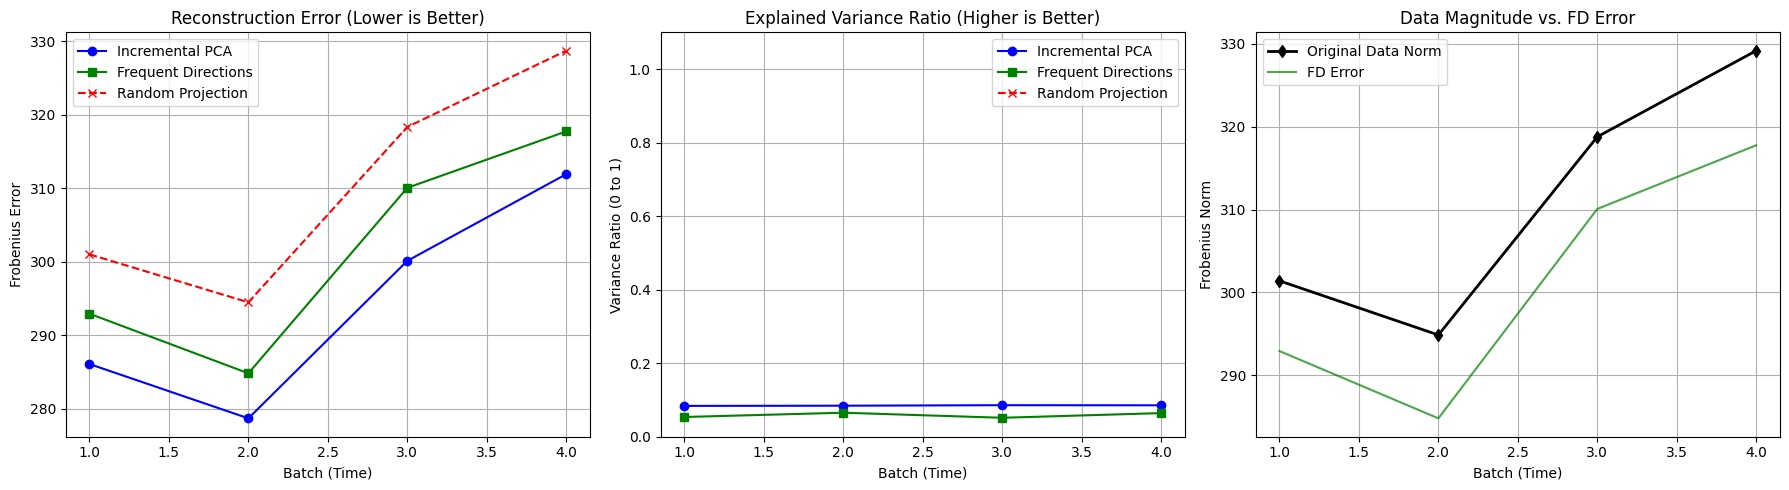

In [ ]:
import matplotlib.pyplot as plt




plt.figure(figsize=(18, 5))




plt.subplot(1, 3, 1)
plt.plot(metrics_df['Batch_ID'], metrics_df['IPCA_Rec_Error'], marker='o', label='Incremental PCA', color='blue')
plt.plot(metrics_df['Batch_ID'], metrics_df['FD_Rec_Error'], marker='s', label='Frequent Directions', color='green')
plt.plot(metrics_df['Batch_ID'], metrics_df['RGP_Rec_Error'], marker='x', label='Random Projection', color='red', linestyle='--')

plt.title('Reconstruction Error (Lower is Better)')
plt.xlabel('Batch (Time)')
plt.ylabel('Frobenius Error')
plt.legend()
plt.grid(True)




plt.subplot(1, 3, 2)
plt.plot(metrics_df['Batch_ID'], metrics_df['IPCA_Exp_Var'], marker='o', label='Incremental PCA', color='blue')
plt.plot(metrics_df['Batch_ID'], metrics_df['FD_Exp_Var'], marker='s', label='Frequent Directions', color='green')

plt.plot(metrics_df['Batch_ID'], metrics_df['RGP_Exp_Var'], marker='x', label='Random Projection', color='red', linestyle='--')

plt.title('Explained Variance Ratio (Higher is Better)')
plt.xlabel('Batch (Time)')
plt.ylabel('Variance Ratio (0 to 1)')
plt.legend()
plt.ylim(0, 1.1) 
plt.grid(True)





plt.subplot(1, 3, 3)
plt.plot(metrics_df['Batch_ID'], metrics_df['Original_Frobenius_Norm'], marker='d', label='Original Data Norm', color='black', linewidth=2)
plt.plot(metrics_df['Batch_ID'], metrics_df['FD_Rec_Error'], label='FD Error', color='green', alpha=0.7)

plt.title('Data Magnitude vs. FD Error')
plt.xlabel('Batch (Time)')
plt.ylabel('Frobenius Norm')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import warnings


warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth
from scipy import sparse




def run_fpgrowth_sparse(data_sparse, min_support=0.03, col_names=None):
    """
    Runs FP-Growth on a sparse matrix directly.
    """
    
    
    df_sparse = pd.DataFrame.sparse.from_spmatrix(
        data_sparse,
        columns=col_names
    )

    
    
    return fpgrowth(df_sparse, min_support=min_support, use_colnames=True)




print("Reconstructing and compressing...")


compressed_ipca = ipca.transform(basket_sorted)
reconstructed_dense = ipca.inverse_transform(compressed_ipca)




binary_bool = reconstructed_dense > 0.1



reconstructed_sparse = sparse.csr_matrix(binary_bool)


del reconstructed_dense
del binary_bool
import gc
gc.collect() 





support_threshold = 0.03

print(f"Mining Original Data (Support={support_threshold})...")

original_sparse = sparse.csr_matrix(basket_sorted.values)
truth_itemsets = run_fpgrowth_sparse(
    original_sparse,
    min_support=support_threshold,
    col_names=basket_sorted.columns
)
print(f"-> Found {len(truth_itemsets)} patterns in Original.")

print(f"Mining Reconstructed Data (Support={support_threshold})...")
ipca_itemsets = run_fpgrowth_sparse(
    reconstructed_sparse,
    min_support=support_threshold,
    col_names=basket_sorted.columns
)
print(f"-> Found {len(ipca_itemsets)} patterns in Reconstructed.")





truth_set = set(truth_itemsets['itemsets'])
ipca_set = set(ipca_itemsets['itemsets'])

common = truth_set.intersection(ipca_set)
accuracy = len(common) / len(truth_set) * 100 if len(truth_set) > 0 else 0

print("\n--- Final Results ---")
print(f"Accuracy (Pattern Recovery): {accuracy:.2f}%")
print(f"Patterns Lost: {len(truth_set - ipca_set)}")
print(f"Ghost Patterns Created: {len(ipca_set - truth_set)}")

Stream created with 5 batches.
Anomaly injected at Batch #3


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GaussianRandomProjection was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GaussianRandomProjection was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GaussianRandomProjection was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GaussianRandomProjection was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GaussianRandomProjection was fitted with feature names
  warnings.warn(



--- Anomaly Detection Report ---
 Batch_ID    Type  IPCA_Error    FD_Error
        1  Normal  283.527317  293.385464
        2  Normal  278.144707  285.491611
        3 ANOMALY 5967.877723 5967.313182
        4  Normal  314.072378  310.008451
        5  Normal  324.141712  319.424352


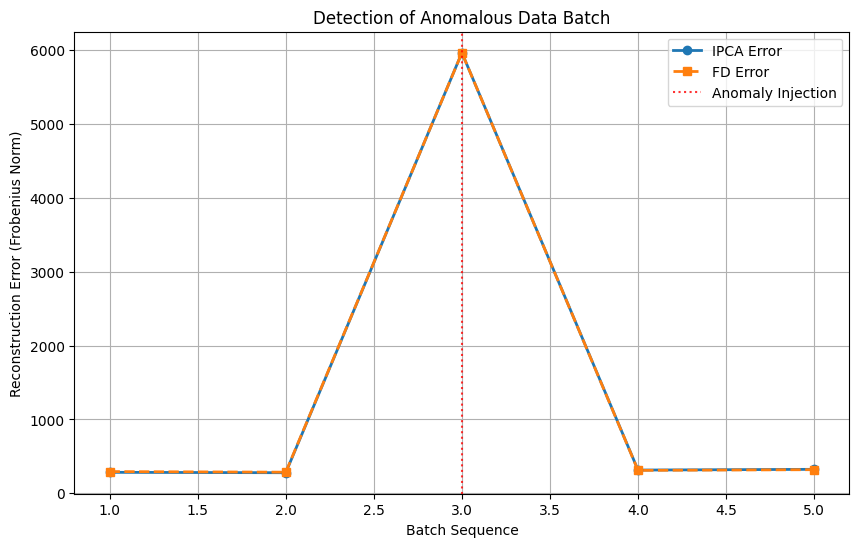

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error







np.random.seed(999)

sample_batch = batches[0]
n_rows = sample_batch.shape[0]
n_cols = sample_batch.shape[1]


noise_data = np.random.randint(0, 5, size=(n_rows, n_cols))
anomaly_batch = pd.DataFrame(noise_data, columns=sample_batch.columns)






mixed_batches = batches[:2] + [anomaly_batch] + batches[2:]
anomaly_index = 3 

print(f"Stream created with {len(mixed_batches)} batches.")
print(f"Anomaly injected at Batch 





ipca_anom = IncrementalPCA(n_components=10)
fd_anom = FrequentDirections(d=n_cols, k=10)



anomaly_log = []

for i, batch in enumerate(mixed_batches):
    batch_val = batch.values

    
    ipca_anom.partial_fit(batch_val)
    rec_ipca = ipca_anom.inverse_transform(ipca_anom.transform(batch_val))
    error_ipca = np.linalg.norm(batch_val - rec_ipca, 'fro')

    
    fd_anom.fit_partial(batch)
    basis_fd = get_fd_basis(fd_anom.sketch[:fd_anom.current_row, :])
    rec_fd = np.dot(np.dot(batch_val, basis_fd.T), basis_fd)
    error_fd = np.linalg.norm(batch_val - rec_fd, 'fro')

    
    
    trans_rgp = rgp.transform(batch_val)
    
    rec_rgp = np.dot(trans_rgp, components_pinv.T)
    error_rgp = np.linalg.norm(batch_val - rec_rgp, 'fro')

    anomaly_log.append({
        'Batch_ID': i + 1,
        'Type': 'ANOMALY' if (i + 1) == anomaly_index else 'Normal',
        'IPCA_Error': error_ipca,
        'FD_Error': error_fd,
        'RGP_Error': error_rgp
    })




df_anom = pd.DataFrame(anomaly_log)
print("\n--- Anomaly Detection Report ---")

print(df_anom[['Batch_ID', 'Type', 'IPCA_Error', 'FD_Error']].to_string(index=False))




plt.figure(figsize=(10, 6))

plt.plot(df_anom['Batch_ID'], df_anom['IPCA_Error'], marker='o', label='IPCA Error', linewidth=2)
plt.plot(df_anom['Batch_ID'], df_anom['FD_Error'], marker='s', label='FD Error', linewidth=2, linestyle='--')


plt.axvline(x=anomaly_index, color='red', linestyle=':', alpha=0.8, label='Anomaly Injection')

plt.title('Detection of Anomalous Data Batch')
plt.xlabel('Batch Sequence')
plt.ylabel('Reconstruction Error (Frobenius Norm)')
plt.legend()
plt.grid(True)
plt.show()